Found 11325 images belonging to 2 classes.
Found 3182 images belonging to 2 classes.
Found 2148 images belonging to 2 classes.
Epoch 1/20
176/176 [==============================] - 51s 284ms/step - loss: 0.5907 - accuracy: 0.6681 - val_loss: 0.5382 - val_accuracy: 0.7127
Epoch 2/20
176/176 [==============================] - 50s 283ms/step - loss: 0.4332 - accuracy: 0.7982 - val_loss: 0.4374 - val_accuracy: 0.7934
Epoch 3/20
176/176 [==============================] - 50s 286ms/step - loss: 0.3557 - accuracy: 0.8433 - val_loss: 0.4346 - val_accuracy: 0.8071
Epoch 4/20
176/176 [==============================] - 51s 289ms/step - loss: 0.3291 - accuracy: 0.8573 - val_loss: 0.3813 - val_accuracy: 0.8268
Epoch 5/20
176/176 [==============================] - 52s 292ms/step - loss: 0.2961 - accuracy: 0.8739 - val_loss: 0.4204 - val_accuracy: 0.8179
Epoch 6/20
176/176 [==============================] - 51s 292ms/step - loss: 0.2720 - accuracy: 0.8876 - val_loss: 0.3248 - val_accuracy: 0.8616
Epo

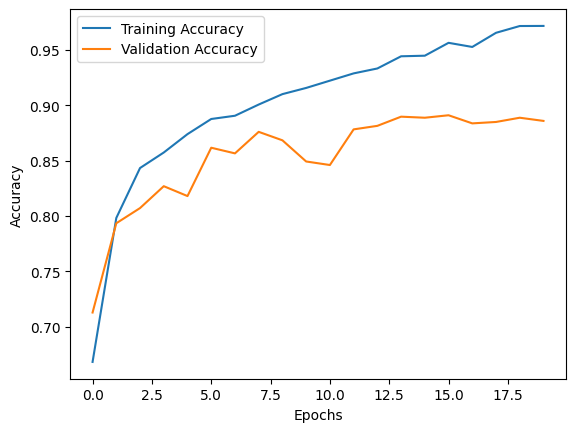

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the paths to your data
train_dir = 'D:/1work/in-data/Input/Train'
test_dir = 'D:/1work/in-data/Input/Test'
validate_dir = 'D:/1work/in-data/Input/Validation'

# Image size and batch size
img_size = (150, 150)
batch_size = 64

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255)

# Rescale the validation and test sets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validate_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Define the model
model = models.Sequential()

model.add(layers.Conv2D( 16,(3, 3), activation='relu', input_shape=(150, 150, 3)))  # Reduced filters to 16
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D( 8,(3, 3), activation='relu'))  # Reduced filters to 32
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D( 4,(3, 3), activation='relu'))  # Reduced filters to 64
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy}')

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


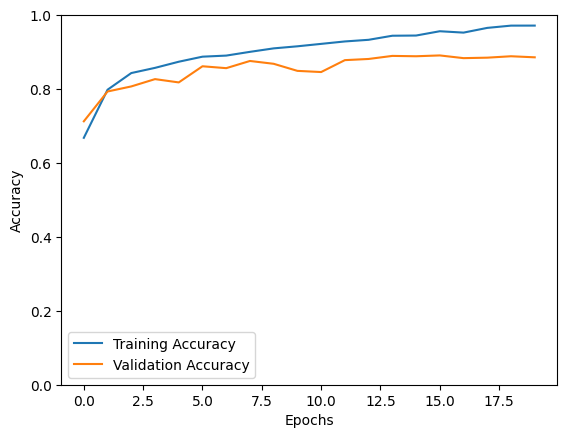

In [6]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to display values from 0 to 1
plt.legend()
plt.show()